# Entrenamiento K-means - Clustering de Hospitales

## Objetivo
Agrupar hospitales por especialidades similares usando **Machine Learning No Supervisado (K-means)**.

## Dataset
- **Archivo:** `hospitales.csv`
- **Registros:** 30 hospitales
- **Features:** Especialidades médicas (8 columnas)

## Uso
Cuando se necesita traslado, filtrar hospitales del cluster adecuado según tipo de emergencia.

In [1]:
# Importaciones
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns

print('Librerías importadas correctamente')

Librerías importadas correctamente


## 1. Cargar datos

In [2]:
# Cargar CSV
ruta_csv = '../archivos_csv/hospitales.csv'
df = pd.read_csv(ruta_csv)

print(f'Dataset cargado: {df.shape[0]} hospitales, {df.shape[1]} columnas')
df.head()

Dataset cargado: 30 hospitales, 10 columnas


,hospital_id,nombre,latitud,longitud,capacidad_actual,capacidad_maxima,tiempo_atencion_promedio,tasa_exito,nivel,especialidades
0,HOSP001,Hospital San José #1,-17.841400,-63.198725,46,50,80,0.95,III,"general,toxicologia,neurologia"
1,HOSP002,Hospital Del Sur #2,-17.752352,-63.219334,6,50,42,0.95,II,"neurologia,ortopedia,pediatria"
2,HOSP003,Hospital Del Sur #3,-17.775689,-63.160770,33,50,25,0.95,I,"pediatria,trauma"
3,HOSP004,Hospital Del Sur #4,-17.828552,-63.206098,15,50,79,0.89,II,"ortopedia,pediatria"
4,HOSP005,Hospital Del Norte #5,-17.845405,-63.220798,41,50,46,0.96,I,"pediatria,neurologia,cardiologia,trauma"


## 2. Exploración de datos

In [3]:
# Información del dataset
print('=== INFORMACIÓN DEL DATASET ===')
print(df.info())

print('\n=== VALORES FALTANTES ===')
print(df.isnull().sum())

print('\n=== COLUMNAS DISPONIBLES ===')
print(df.columns.tolist())

=== INFORMACIÓN DEL DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   hospital_id               30 non-null     object 
 1   nombre                    30 non-null     object 
 2   latitud                   30 non-null     float64
 3   longitud                  30 non-null     float64
 4   capacidad_actual          30 non-null     int64  
 5   capacidad_maxima          30 non-null     int64  
 6   tiempo_atencion_promedio  30 non-null     int64  
 7   tasa_exito                30 non-null     float64
 8   nivel                     30 non-null     object 
 9   especialidades            30 non-null     object 
dtypes: float64(3), int64(3), object(4)
memory usage: 2.5+ KB
None

=== VALORES FALTANTES ===
hospital_id                 0
nombre                      0
latitud                     0
longitud             

## 3. Procesar especialidades

In [4]:
# Verificar si especialidades están como string o columnas separadas
if 'especialidades' in df.columns:
    print('Especialidades en formato string, procesando...')
    
    # Crear columnas one-hot para cada especialidad
    especialidades_unicas = ['cardiologia', 'trauma', 'pediatria', 'ortopedia',
                            'neurologia', 'quemados', 'toxicologia', 'general']
    
    for esp in especialidades_unicas:
        df[esp] = df['especialidades'].str.contains(esp, case=False, na=False).astype(int)
    
    print('Especialidades procesadas:')
    print(df[especialidades_unicas].head())
else:
    print('Especialidades ya están en columnas separadas')
    especialidades_unicas = ['cardiologia', 'trauma', 'pediatria', 'ortopedia',
                            'neurologia', 'quemados', 'toxicologia', 'general']

Especialidades en formato string, procesando...
Especialidades procesadas:
   cardiologia  trauma  pediatria  ortopedia  neurologia  quemados  \
0            0       0          0          0           1         0   
1            0       0          1          1           1         0   
2            0       1          1          0           0         0   
3            0       0          1          1           0         0   
4            1       1          1          0           1         0   

   toxicologia  general  
0            1        1  
1            0        0  
2            0        0  
3            0        0  
4            0        0  


## 4. Preparar features para clustering

In [5]:
# Features: Solo especialidades (variables binarias)
X = df[especialidades_unicas].values

print(f'Features shape: {X.shape}')
print(f'\nEjemplo de features (primeros 3 hospitales):')
print(pd.DataFrame(X[:3], columns=especialidades_unicas))

Features shape: (30, 8)

Ejemplo de features (primeros 3 hospitales):
   cardiologia  trauma  pediatria  ortopedia  neurologia  quemados  \
0            0       0          0          0           1         0   
1            0       0          1          1           1         0   
2            0       1          1          0           0         0   

   toxicologia  general  
0            1        1  
1            0        0  
2            0        0  


## 5. Determinar número óptimo de clusters (Método del Codo)

In [6]:
# Probar diferentes valores de K
inertias = []
silhouette_scores = []
K_range = range(2, 8)

for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(X)
    inertias.append(kmeans_temp.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans_temp.labels_))

print('=== ANÁLISIS DE CLUSTERS ===')
for k, inertia, silhouette in zip(K_range, inertias, silhouette_scores):
    print(f'K={k}: Inertia={inertia:.2f}, Silhouette={silhouette:.3f}')

=== ANÁLISIS DE CLUSTERS ===
K=2: Inertia=46.13, Silhouette=0.148
K=3: Inertia=40.80, Silhouette=0.120
K=4: Inertia=35.33, Silhouette=0.149
K=5: Inertia=31.07, Silhouette=0.174
K=6: Inertia=28.28, Silhouette=0.164
K=7: Inertia=25.15, Silhouette=0.174


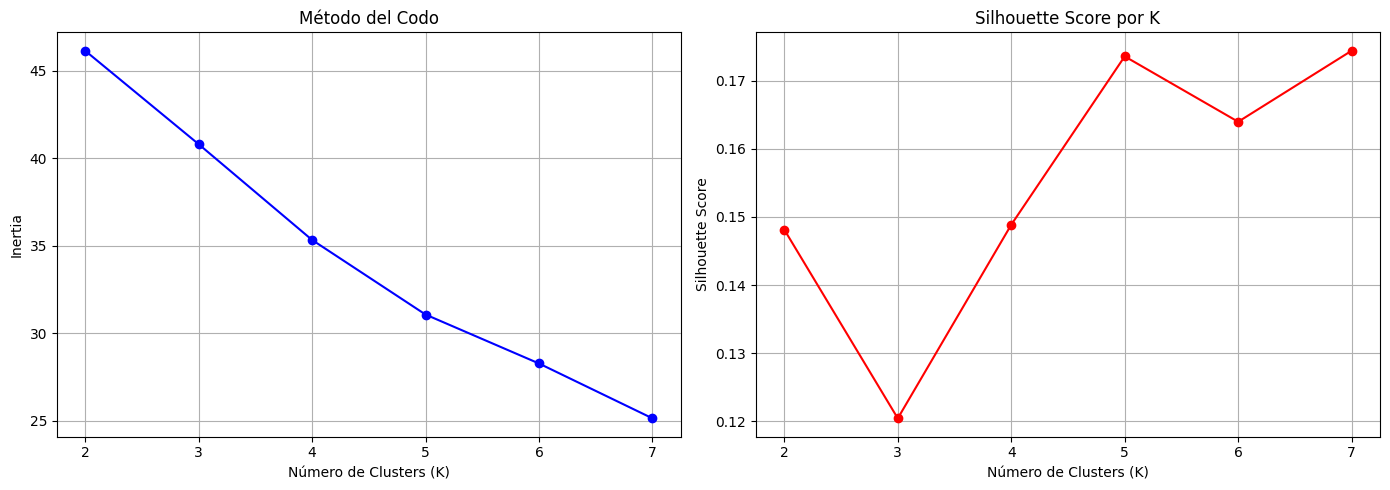


Recomendación: Buscar "codo" en gráfica 1 o máximo en gráfica 2


In [7]:
# Visualizar método del codo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Inertia
ax1.plot(K_range, inertias, 'bo-')
ax1.set_xlabel('Número de Clusters (K)')
ax1.set_ylabel('Inertia')
ax1.set_title('Método del Codo')
ax1.grid(True)

# Gráfico 2: Silhouette Score
ax2.plot(K_range, silhouette_scores, 'ro-')
ax2.set_xlabel('Número de Clusters (K)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score por K')
ax2.grid(True)

plt.tight_layout()
plt.show()

print('\nRecomendación: Buscar "codo" en gráfica 1 o máximo en gráfica 2')

## 6. Entrenar K-means con K óptimo

In [8]:
# Elegir K=4 (puedes ajustar según gráficas)
K_optimo = 4

print(f'Entrenando K-means con K={K_optimo}...')
kmeans = KMeans(n_clusters=K_optimo, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

print(f'Entrenamiento completado!')
print(f'Silhouette Score: {silhouette_score(X, clusters):.3f}')

Entrenando K-means con K=4...
Entrenamiento completado!
Silhouette Score: 0.149


## 7. Análisis de clusters

In [9]:
# Agregar clusters al dataframe
df['cluster'] = clusters

print('=== DISTRIBUCIÓN DE CLUSTERS ===')
print(df['cluster'].value_counts().sort_index())

print('\n=== HOSPITALES POR CLUSTER ===')
for cluster_id in range(K_optimo):
    print(f'\nCluster {cluster_id}:')
    hospitales_cluster = df[df['cluster'] == cluster_id]['nombre'].tolist()
    for i, hospital in enumerate(hospitales_cluster, 1):
        print(f'  {i}. {hospital}')

=== DISTRIBUCIÓN DE CLUSTERS ===
cluster
0    8
1    8
2    8
3    6
Name: count, dtype: int64

=== HOSPITALES POR CLUSTER ===

Cluster 0:
  1. Hospital San José #7
  2. Hospital San José #8
  3. Hospital San José #9
  4. Hospital Del Norte #12
  5. Hospital Del Sur #13
  6. Hospital Del Norte #15
  7. Hospital San José #19
  8. Hospital Del Sur #22

Cluster 1:
  1. Hospital Del Sur #2
  2. Hospital Del Sur #4
  3. Hospital Del Norte #11
  4. Hospital Del Norte #17
  5. Hospital Central #18
  6. Hospital Santa Cruz #21
  7. Hospital Del Norte #23
  8. Hospital San José #28

Cluster 2:
  1. Hospital San José #1
  2. Hospital Central #6
  3. Hospital Santa Cruz #10
  4. Hospital Del Norte #14
  5. Hospital Santa Cruz #16
  6. Hospital Central #25
  7. Hospital San José #26
  8. Hospital Regional #27

Cluster 3:
  1. Hospital Del Sur #3
  2. Hospital Del Norte #5
  3. Hospital Santa Cruz #20
  4. Hospital San José #24
  5. Hospital Central #29
  6. Hospital Central #30


## 8. Caracterizar clusters (especialidades dominantes)

In [10]:
print('=== CARACTERIZACIÓN DE CLUSTERS ===')
print('(Porcentaje de hospitales con cada especialidad por cluster)\n')

for cluster_id in range(K_optimo):
    print(f'\n--- CLUSTER {cluster_id} ---')
    cluster_data = df[df['cluster'] == cluster_id]
    
    # Calcular porcentaje de cada especialidad
    especialidades_pct = (cluster_data[especialidades_unicas].sum() / len(cluster_data) * 100)
    especialidades_pct = especialidades_pct.sort_values(ascending=False)
    
    print(f'Cantidad de hospitales: {len(cluster_data)}')
    print('\nEspecialidades dominantes:')
    for esp, pct in especialidades_pct.items():
        if pct > 0:
            print(f'  {esp:15s} {pct:5.1f}%')

=== CARACTERIZACIÓN DE CLUSTERS ===
(Porcentaje de hospitales con cada especialidad por cluster)


--- CLUSTER 0 ---
Cantidad de hospitales: 8

Especialidades dominantes:
  quemados        100.0%
  trauma           87.5%
  ortopedia        75.0%
  cardiologia      62.5%
  neurologia       37.5%
  pediatria        25.0%
  toxicologia      12.5%
  general          12.5%

--- CLUSTER 1 ---
Cantidad de hospitales: 8

Especialidades dominantes:
  pediatria        87.5%
  ortopedia        75.0%
  neurologia       50.0%
  general          37.5%
  quemados         25.0%
  toxicologia      25.0%
  cardiologia      12.5%

--- CLUSTER 2 ---
Cantidad de hospitales: 8

Especialidades dominantes:
  toxicologia      87.5%
  quemados         62.5%
  neurologia       50.0%
  trauma           37.5%
  cardiologia      25.0%
  general          25.0%
  ortopedia        12.5%

--- CLUSTER 3 ---
Cantidad de hospitales: 6

Especialidades dominantes:
  trauma          100.0%
  pediatria        83.3%
  neurolog

## 9. Visualización de clusters

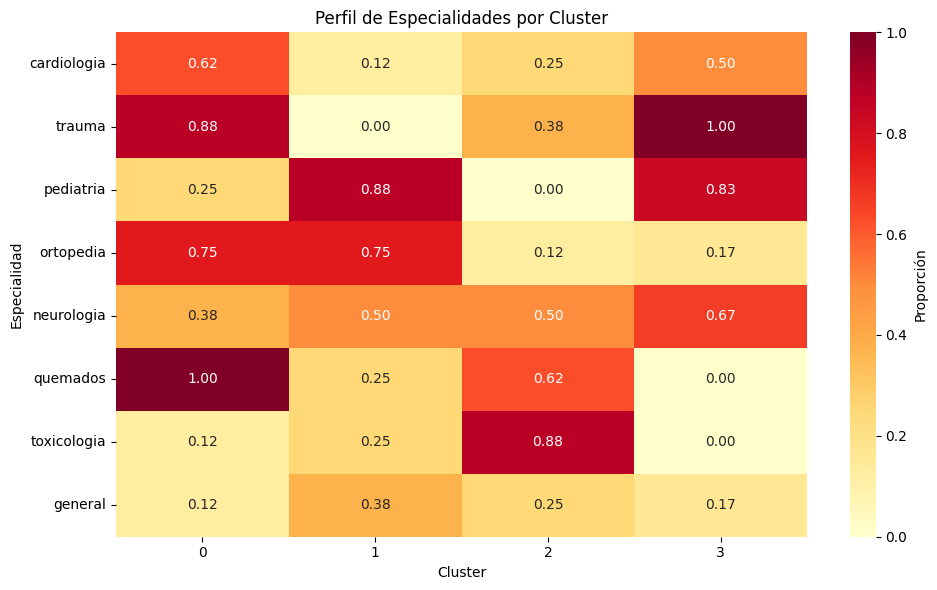

In [11]:
# Heatmap de especialidades por cluster
cluster_profiles = df.groupby('cluster')[especialidades_unicas].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_profiles.T, annot=True, fmt='.2f', cmap='YlOrRd', cbar_kws={'label': 'Proporción'})
plt.title('Perfil de Especialidades por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Especialidad')
plt.tight_layout()
plt.show()

## 10. Guardar modelo y metadatos

In [12]:
# Crear directorio
os.makedirs('../modelos_ml', exist_ok=True)

# Guardar modelo K-means
joblib.dump(kmeans, '../modelos_ml/modelo_kmeans.pkl')
print('Modelo guardado: modelos_ml/modelo_kmeans.pkl')

# Guardar lista de especialidades (orden importante)
joblib.dump(especialidades_unicas, '../modelos_ml/especialidades_list.pkl')
print('Especialidades guardadas: modelos_ml/especialidades_list.pkl')

# Guardar mapeo cluster -> características
cluster_info = {}
for cluster_id in range(K_optimo):
    cluster_data = df[df['cluster'] == cluster_id]
    especialidades_dominantes = (cluster_data[especialidades_unicas].sum() / len(cluster_data))
    especialidades_dominantes = especialidades_dominantes[especialidades_dominantes > 0.5].index.tolist()
    
    cluster_info[cluster_id] = {
        'especialidades': especialidades_dominantes,
        'hospitales': cluster_data['hospital_id'].tolist()
    }

joblib.dump(cluster_info, '../modelos_ml/cluster_info.pkl')
print('Información de clusters guardada: modelos_ml/cluster_info.pkl')

print('\n¡Entrenamiento K-means completado exitosamente!')

Modelo guardado: modelos_ml/modelo_kmeans.pkl
Especialidades guardadas: modelos_ml/especialidades_list.pkl
Información de clusters guardada: modelos_ml/cluster_info.pkl

¡Entrenamiento K-means completado exitosamente!


## 11. Guardar dataset con clusters en CSV

In [13]:
# Guardar CSV con clusters asignados
df.to_csv('../archivos_csv/hospitales_con_clusters.csv', index=False)
print('Dataset con clusters guardado: archivos_csv/hospitales_con_clusters.csv')

print('\nPrimeros 5 hospitales con sus clusters:')
print(df[['hospital_id', 'nombre', 'cluster']].head())

Dataset con clusters guardado: archivos_csv/hospitales_con_clusters.csv

Primeros 5 hospitales con sus clusters:
  hospital_id                 nombre  cluster
0     HOSP001   Hospital San José #1        2
1     HOSP002    Hospital Del Sur #2        1
2     HOSP003    Hospital Del Sur #3        3
3     HOSP004    Hospital Del Sur #4        1
4     HOSP005  Hospital Del Norte #5        3
